# (Part 1) Process of forecasting the output electricity for power plant working in combined cycle by the linear regression equation

Today we find out how to create simple regression model to predict level of output electricity in power plant works in combined cycle.
Źródło bazy danych:  https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

Registry contains 9568 measurements made in the period between 2006 and 2011. During the survey power plant was working in full capacity. Registry contains following of process characteristic:

- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

# Process of forecasting by the linear regression model

We open database and useful libraries.

In [1]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math

## https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

df = pd.read_excel('c:/1/Folds5x2_pp.xlsx')
df.sample(5)

,AT,V,AP,RH,PE
5844,20.76,59.21,1017.94,80.84,447.67
8410,7.54,38.56,1016.49,69.10,486.76
7916,14.73,58.20,1019.45,82.48,458.56
2253,14.56,40.69,1015.48,73.73,469.31
6735,14.57,37.86,1022.44,68.82,463.58


We analyze size and parameters of registry.

In [2]:
df.shape

(9568, 5)

In [3]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

For improve transparency of code we changed names of columns.

In [4]:
df.columns = ['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure', 'Relative_Humidity', 'Energy_output']
df.sample(5)

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
9540,23.53,50.05,1005.63,78.40,443.71
9270,7.49,39.81,1018.20,85.96,483.71
163,21.87,61.45,1011.13,92.22,445.21
3479,21.63,50.16,1005.70,84.84,448.32
774,26.28,75.23,1011.44,68.35,435.28


# Base conditions to realize linear regression model

Failure to comply of these rules lead to wrong, misleading result of model calculation.
1. There are no correlation between descriptive variables (independent variables)
2. There are exist linear relationship between predictive and result variables.
3. The errors from the model should have normal distribution.
4. Homogeneous of error variance 
5. Lack of correlation between errors. Errors from one observation should be independent to errors from other observation.


# Analyze of relationship between dependent and independent variables

In [5]:
CORREL = df.corr().sort_values('Energy_output')
CORREL['Energy_output']

Temperature         -0.948128
Exhaust_Vacuum      -0.869780
Relative_Humidity    0.389794
Ambient_Pressure     0.518429
Energy_output        1.000000
Name: Energy_output, dtype: float64

There are high level of correlation between result variable: energy output (EP) and exogenic factors: Temperature (T) and Exhaust Vacuum (V).

# One factor regression model

In [6]:
lm = smf.ols(formula = 'Energy_output ~ Temperature', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Energy_output   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:10:52   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     497.0341      0.156   3177.280      0.000     496.727     497.341
Temperature    -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

One factor regression model has a very good predictive properties.

Text(0.5, 1.0, 'Linear Regression Plot')

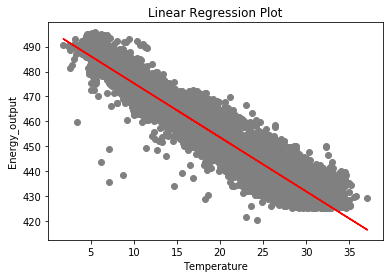

In [7]:
plt.figure()
plt.scatter(df.Temperature, df.Energy_output, c = 'grey')
plt.plot(df.Temperature, lm.params[0] + lm.params[1] * df.Temperature, c = 'r')
plt.xlabel('Temperature')
plt.ylabel('Energy_output')
plt.title("Linear Regression Plot")

# Multi factor regression model

In [8]:
lm = smf.ols(formula = 'Energy_output ~ Temperature + Exhaust_Vacuum + Relative_Humidity + Ambient_Pressure', data = df).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Energy_output   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:10:53   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           454.6093      9.74

Multi factor regression model have very good descriptive features. It raises doubts.

# Analyze of variables used in mode

In [9]:
df.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Analyze of distribution of result variable

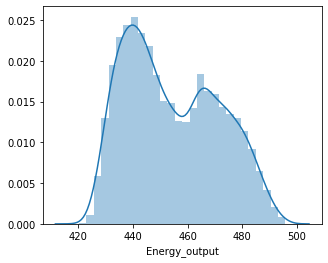

In [10]:
plt.rcParams['figure.figsize'] = (5, 4)
sns.distplot(df['Energy_output'])    

# Analysis of correlation between independent variables

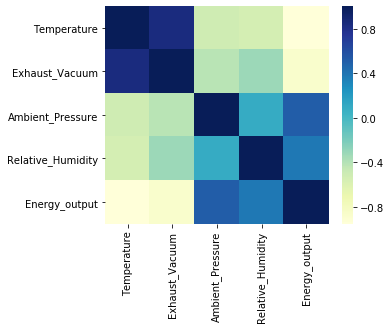

In [11]:
plt.rcParams['figure.figsize'] = (5, 4)
sns.heatmap (df.corr (), cmap="YlGnBu")

We can easily remark that between independent variables: Temperature (T) and Exhaust Vacuum (V) exist very high positive correlation.
Another form of correlation matrix.

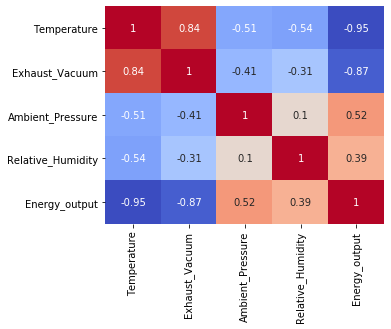

In [12]:
sns.heatmap (df.corr (), cmap="coolwarm", annot=True, cbar=False)

We check completeness of survey.

In [13]:
df.isnull().sum()

Temperature          0
Exhaust_Vacuum       0
Ambient_Pressure     0
Relative_Humidity    0
Energy_output        0
dtype: int64

# Graphical presentation of relationship between independent and dependent variables

We divide result variable into two categories: "High power" and "Low power". We do it to remark what descriptive variables work.

In [14]:
Ewa = ['High power', 'Low power']

df['Power'] = pd.qcut(df['Energy_output'],2, labels=Ewa)
df.sample(4)

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_output,Power
2743,30.20,73.67,1006.31,62.14,428.72,High power
1095,30.33,68.67,1006.00,54.99,435.53,High power
4327,9.15,41.82,1032.88,75.11,477.78,Low power
3457,32.74,68.31,1010.23,41.29,441.66,High power


We create graphical relationship matrix.

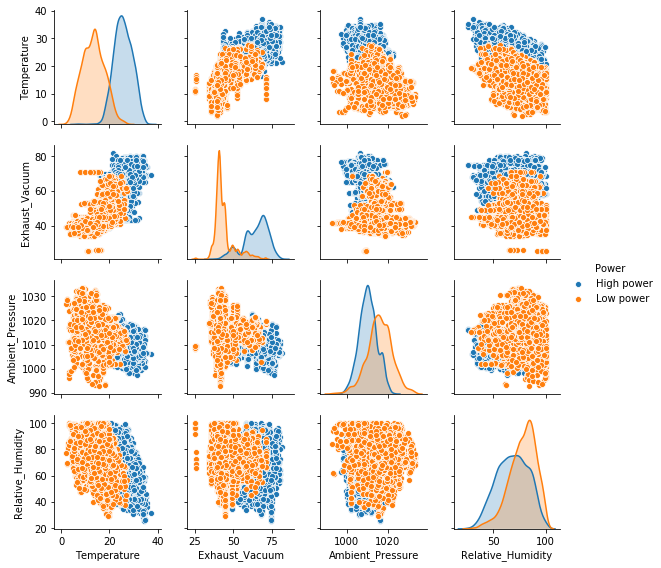

In [15]:
sns.pairplot(data=df[['Temperature' ,'Exhaust_Vacuum','Ambient_Pressure', 'Relative_Humidity', 'Power']], hue='Power', dropna=True, height=2)

Relationship among Temperature (T) and Exhaust Vacuum (V) ones again showed high level of correlation.

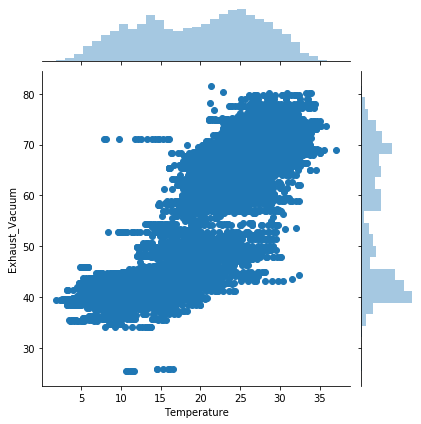

In [16]:
sns.jointplot(x='Temperature', y='Exhaust_Vacuum', data=df)